### Problem 1
Create any multiple linear model. For example, it may be $y = 3x_1 + 5x_2 + \mu$ or $y = 4x_1 - 3x_2 + 9x_3 + \mu$. Then:
    - (a) generate random 30 observations depend on the model.
    - (b) fit a linear model depends on the observations generated by step (a), and record the coefficients.
    - (c) repeat (a) and (b) 100 times. Calculate the mean and variance of the coefficients.
Note that each time the generated observations should come from the sample distribution. If you do not understand, just use the `random.rand` function. 


In [11]:
### your solution
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn import linear_model
%matplotlib inline

In [12]:
ols = linear_model.LinearRegression()

In [13]:
np.random.seed(0)

N = 30
beta = np.array([4,5,6])
x_m = np.random.randn(N, 2)
y_m = np.dot(np.append(np.ones((N,1)), x_m, axis=1), beta) + np.random.randn(N)*4


In [14]:
ols.fit(x_m, y_m)
print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x_m) - y_m) ** 2))
print("R^2: %.5f" % ols.score(x_m, y_m))

beta_1, beta_2: [ 4.068  6.052]
beta_0: 3.536
RSS: 398.32
R^2: 0.80400


In [15]:
coeffs = np.array([np.ones(100), np.ones(100), np.ones(100)])

for i in range(100):
#     np.random.seed(i)   # dont need this because will just do random anyway?
    ols.fit(x_m, y_m)
    coeffs[0][i] = ols.intercept_
    coeffs[1][i] = ols.coef_[0]
    coeffs[2][i] = ols.coef_[1]


print([np.mean(x) for x in coeffs])
# same results as above for beta0 and betas

[3.5359418671727307, 4.0677592459089285, 6.0520024982926426]


### Problem 2
This question involves the use of simple linear regression on the Auto data set(In the file "Auto.csv"). Perform a simple linear regression with *mpg* as the response and *horsepower* as the predictor. 
    - (a) What is the coefficient of mpg? How to explain it?
    - (b) What is the coefficient of determination of the model? How to explain it?
    - (c) Write down the formula of the model.
    - (d) What is the predicted mpg associated with a horsepower of 98?
    - (e) Plot the response and the predictor.  as well as the least squares regression line.

In [16]:
### your solution
# give the path to the file 
path_to_file = "./data/Auto.csv"
data = pd.read_csv(path_to_file)

x = data[["horsepower"]]
y = data[["mpg"]]

data.head()
ols.fit(x,y)
print("Beta: %s" %str(ols.coef_))
# for each unit increase in horsepower, mpg decreases 0.15

Beta: [[-0.15784473]]


In [17]:
print('R squared:' + str(ols.score(x,y)))
# 60% of variance in mpg explained by horsepower

R squared:0.605948257889


In [18]:
print(str(ols.intercept_[0]) + ' + -0.15*horsepower = mpg')
39.9 - 0.157844*98  # 24.4

39.9358610212 + -0.15*horsepower = mpg


24.431287999999995

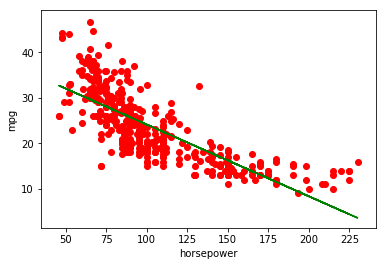

In [19]:
plt.plot(x, ols.predict(x), color = 'green')
plt.scatter(x, y, c='r')
plt.xlabel("horsepower")
plt.ylabel("mpg")

### Problem 3
Without using the sklearn library, calculate the coefficients manually by employing the numpy library, as well as the coefficient of determination and prediction. Note that the results should be exactly the same with the results in question (2).

In [20]:
### your solution
x = data['horsepower']
y = data['mpg']
beta = np.sum((x - np.mean(x))*(y-np.mean(y)))/np.sum((x - np.mean(x))**2)
beta0 = np.mean(y) - beta*np.mean(x)
print(str(beta) + '*horsepower + ' + str(beta0))
# same

RSS = np.sum((y - beta0 - beta*x)**2)
TSS = np.sum((y - np.mean(y))**2)
R_squared = 1 - RSS/TSS
print(R_squared) # 0.605 same

-0.157844733354*horsepower + 39.9358610212
0.605948257889


In [21]:
from sklearn import linear_model
import numpy as np
coefs = []
ols = linear_model.LinearRegression()
np.random.seed(2016)
for i in range(100):
    x = np.random.rand(30, 2)
    y = x[:, 0] + 2*x[:, 1] + np.random.rand(30)
    ols.fit(x, y)
    coefs.append(ols.coef_)

print "The mean of the estimated coefficients are: " + str(np.mean(coefs, 0))
print "The variance of the estimated coefficients are: " + str(np.var(coefs, 0))

SyntaxError: invalid syntax (<ipython-input-21-4a5e13d58c2e>, line 12)

In [ ]:
np.mean(coefs, 0)